In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

df_vacinas = pd.read_csv('SESRS_VAC_APLICACAO_09_12_2021-10_33.csv', sep=';', encoding='cp1252', usecols=['DATA', 'COUNT'])
df_vacinas.head()

,DATA,COUNT
0,2021-07-29,1
1,2021-08-02,1
2,2021-11-05,2
3,2021-11-05,1
4,2021-11-05,2


In [3]:
print(df_vacinas.shape)
df_vacinas['COUNT'].sum()

(7710797, 2)


18272559

In [4]:
df_vacinas['DATA'] = pd.to_datetime(df_vacinas['DATA'])

In [5]:
# Insert Epidemiology Week number
df_vacinas['SE'] = df_vacinas['DATA'].dt.strftime('2021_' + '%U')

In [6]:
df_vacinas.drop('DATA', axis=1, inplace=True)

In [7]:
df_vacinas_se = df_vacinas.groupby('SE').sum().reset_index()

In [8]:
df_vacinas_se.rename(columns = {'COUNT':'APLICADAS'}, inplace=True)

In [9]:
df_vacinas_se

,SE,APLICADAS
0,2021_03,88168
1,2021_04,99556
2,2021_05,69283
3,2021_06,161839
4,2021_07,131101
5,2021_08,95165
6,2021_09,142720
7,2021_10,211891
8,2021_11,259677
9,2021_12,417740


In [10]:
#Chamar banco EAPV
df1 = pd.read_excel('Relatorios/evento_adverso.xlsx', usecols = ['DATA DE INICIO'])

In [11]:
df_eventos = df1.copy()

In [12]:
# Semana epidemiologica
df_eventos['SE'] = df_eventos['DATA DE INICIO'].dt.strftime('2021_' + '%U')

In [13]:
df_eventos = df_eventos.groupby('SE').count().reset_index()

In [14]:
#pd.crosstab(df_eventos['NUMERO DA NOTIFICACAO'], df_eventos['DATA DE INICIO'])

In [15]:
df_eventos.rename(columns = {'DATA DE INICIO':'EVENTOS'}, inplace=True)

In [16]:
df_final = df_vacinas_se.merge(df_eventos, on='SE', how='outer')

In [17]:
# conferir semana epidemiologica do df_eventos, não deveria ter evento na semana 0
df_final 

,SE,APLICADAS,EVENTOS
0,2021_03,88168.0,793.0
1,2021_04,99556.0,5130.0
2,2021_05,69283.0,1836.0
3,2021_06,161839.0,938.0
4,2021_07,131101.0,679.0
5,2021_08,95165.0,591.0
6,2021_09,142720.0,779.0
7,2021_10,211891.0,501.0
8,2021_11,259677.0,316.0
9,2021_12,417740.0,550.0


In [18]:
df_final = df_final[df_final['SE'] > '2021_02']
df_final.dropna(inplace=True)
df_final

<ipython-input-18-bb9a725e1582>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


,SE,APLICADAS,EVENTOS
0,2021_03,88168.0,793.0
1,2021_04,99556.0,5130.0
2,2021_05,69283.0,1836.0
3,2021_06,161839.0,938.0
4,2021_07,131101.0,679.0
5,2021_08,95165.0,591.0
6,2021_09,142720.0,779.0
7,2021_10,211891.0,501.0
8,2021_11,259677.0,316.0
9,2021_12,417740.0,550.0


In [19]:
# calculo de incidencia
df_final['incidencia_1000ds'] = round((df_final['EVENTOS']/df_final['APLICADAS']*1000),2)
df_final

<ipython-input-19-bc38f2ef44f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['incidencia_1000ds'] = round((df_final['EVENTOS']/df_final['APLICADAS']*1000),2)


,SE,APLICADAS,EVENTOS,incidencia_1000ds
0,2021_03,88168.0,793.0,8.99
1,2021_04,99556.0,5130.0,51.53
2,2021_05,69283.0,1836.0,26.50
3,2021_06,161839.0,938.0,5.80
4,2021_07,131101.0,679.0,5.18
5,2021_08,95165.0,591.0,6.21
6,2021_09,142720.0,779.0,5.46
7,2021_10,211891.0,501.0,2.36
8,2021_11,259677.0,316.0,1.22
9,2021_12,417740.0,550.0,1.32


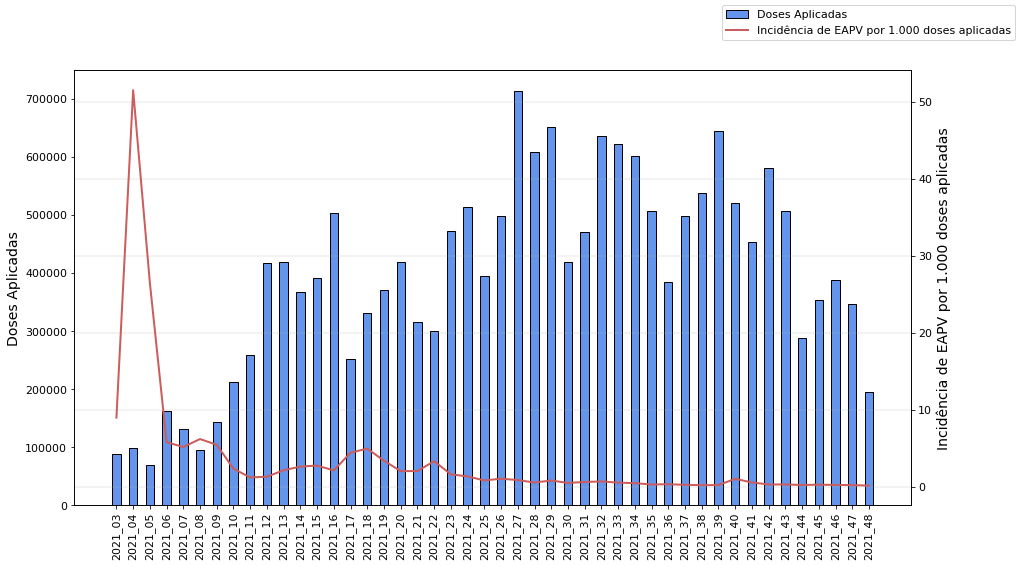

In [28]:
y1 = df_final['APLICADAS']           # Doses aplicadas
y2 = df_final['incidencia_1000ds']   # Incidencia
x = df_final['SE']                   # Semana epidemiologica

width = 0.50
plt.rcParams.update({'font.size':11})
fig, ax1 = plt.subplots(figsize = (15, 8))

ax1.bar(x, y1, width, color='cornflowerblue', label='Doses Aplicadas', edgecolor='#000000')
ax1.set_ylabel('Doses Aplicadas', fontsize=14)

ax1.tick_params('x', rotation=90)
ax2 = plt.twinx(ax1) #compartilhar o mesmo eixo x

ax2.plot(x, y2, linestyle='-', linewidth=2, color='indianred', label='Incidência de EAPV por 1.000 doses aplicadas')
ax2.set_ylabel('Incidência de EAPV por 1.000 doses aplicadas', fontsize=14)

fig.legend()
#fig.legend(loc="upper right", bbox_to_anchor=(0.92,0.98), bbox_transform=ax1.transAxes)
plt.grid(axis='y', linewidth=0.3)
plt.savefig('Graficos/Figura 1.png', dpi=600, bbox_inches='tight', transparent=True)
plt.show()